* Chapter 5 and 6 Exercise
* Cheryl Machingura

In [23]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc2.py")

## Exercise 5-1


In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Normal Distribution for Heights

In [27]:
mu_men = 178
sigma_men = 7.7

Convert heights from feet to inches to cm

In [29]:
height_min_cm = 5 * 30.48 + 10 + 2.54   # 5'10"
height_max_cm = 6 * 30.48 + 1 * 2.54    # 6'1"

Calculate the CDF for the given range

In [30]:
p_min = stats.norm.cdf(height_min_cm, mu_men, sigma_men)
p_max = stats.norm.cdf(height_max_cm, mu_men, sigma_men)

Percentage of men in the height range

In [31]:
percentage_in_range = (p_max - p_min) * 100
print(f"Percentage of US male population between 5'10\" and 6'1\":{percentage_in_range:.2f}%")

Percentage of US male population between 5'10" and 6'1":78.75%




---



# Excercise 5-2

Pareto Distribution for heights

In [32]:
x_m = 1   # minimum value
alpha = 1.7

Generate a Pareto Distribution

In [11]:
s = (np.random.pareto(alpha, 1000) + 1) * x_m

Plot the distribution

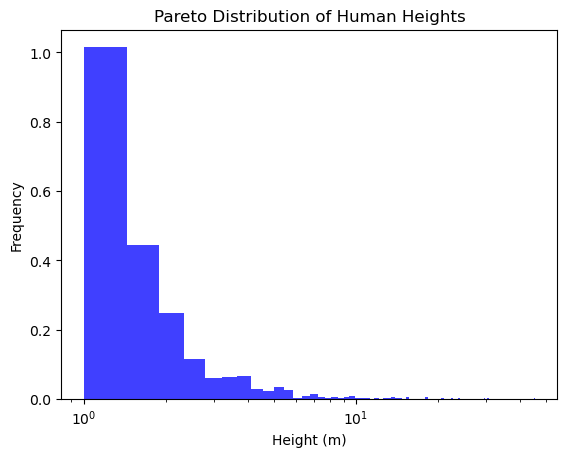

In [12]:
count, bins, _ = plt.hist(s, bins=100, density=True, alpha=0.75,color='blue')
plt.xscale('log')
plt.title('Pareto Distribution of Human Heights')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.show()

Calculate the mean height

In [33]:
mean_height = alpha * x_m / (alpha - 1)
print(f"Mean height in Pareto world: {mean_height:.2f} m")

Mean height in Pareto world: 2.43 m


Fraction of the population shorter than the mean

In [14]:
fraction_shorter = stats.pareto.cdf(mean_height / x_m, alpha)
print(f"Fraction of the population shorter than the mean: {fraction_shorter:.2f}")

Fraction of the population shorter than the mean: 0.78


Expected number of people taller than 1km

In [15]:
height_1km = 1000  # 1km in meters
prob_taller_1km = 1 - stats.pareto.cdf(height_1km / x_m, alpha)
expected_taller_1km = prob_taller_1km * 7_000_000_000
print(f"Number of people expected to be taller than 1km: { expected_taller_1km:.0f}")

Number of people expected to be taller than 1km: 55603


Expected height of the tallest person

In [16]:
tallest_person = x_m * (7_000_000_000 **(1/alpha))
print(f"Expected height of the tallest person:{tallest_person:.2f} m")

Expected height of the tallest person:618349.68 m


# Exercise 6-1 Skewness of Income Distribution

In [42]:
pip install thinkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 633.3 kB/s eta 0:00:000:01
  Preparing metadata (setup.py) ... done
  Created wheel for thinkx: filename=thinkx-1.1.3-py3-none-any.whl size=59925 sha256=25c118fcc54b91bb7e8bad9bb096b2b60f114d5b1372ba42cbeb286bcecb5779
  Stored in directory: /Users/cheryl/Library/Caches/pip/wheels/26/b4/cc/8819524bab9b9a5206fcd073d76db5dc5b7f6c37f186974e0e
Successfully built thinkx
Note: you may need to restart the kernel to use updated packages.


In [34]:
def InterpolateSample(df, log_upper=6.0):
 df['log_upper'] = np.log10(df.income)
 df['log_lower'] = df.log_upper.shift(1)
 df.loc[0, 'log_lower'] = 3.0
 df.loc[41, 'log_upper'] = log_upper
 arrays = []
 for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)
        
 log_sample = np.concatenate(arrays)
 return log_sample


Download the CSV file

In [35]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

Import and read csv file 

In [36]:
import hinc
income_df = hinc.ReadData()

Interpolate income income ranges

In [37]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

Plot Graph for Household income

In [41]:
log_cdf = thinkstats2.Cdf(log_sample) # type: ignore
thinkplot.Cdf(log_cdf) # type: ignore
thinkplot.Config(xlabel='Household income (log $)', # type: ignore
               ylabel='CDF')

NameError: name 'thinkstats2' is not defined

In [ ]:
sample = np.power(10, log_sample)

NameError: name 'np' is not defined

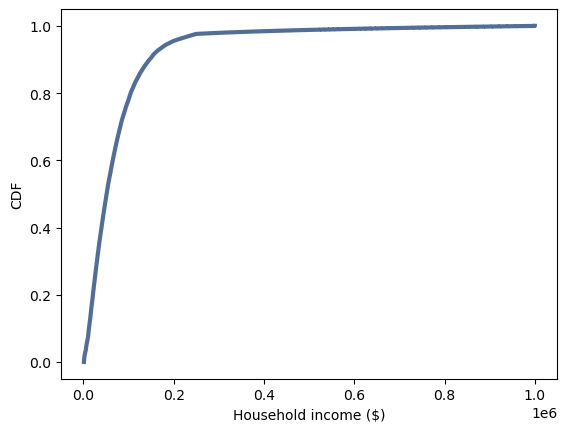

In [ ]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')